data found at https://www.kaggle.com/codename007/funding-successful-projects#train.csv

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, train_test_split
%matplotlib inline

In [7]:
df = pd.read_csv('train.csv')

In [8]:
df = df.dropna()

features = df.drop(columns=['project_id', 'name', 'desc', 'keywords'])

features = pd.get_dummies(features, columns =['disable_communication', 'country', 'currency'])


# Remove Outliers
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1


features = features[~((features < (Q1 - 1.5 * IQR)) |(features > (Q3 + 1.5 * IQR))).any(axis=1)]


In [9]:
features.head()

,goal,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,disable_communication_False,disable_communication_True,country_AU,...,country_US,currency_AUD,currency_CAD,currency_DKK,currency_EUR,currency_GBP,currency_NOK,currency_NZD,currency_SEK,currency_USD
3,500.0,1243555740,1243556121,1240963795,1240966730,18,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,2000.0,1243769880,1243770317,1241177914,1241180541,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
5,700.0,1243815600,1243816219,1241050799,1241464468,14,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
6,250.0,1243872000,1243872028,1241725172,1241736308,2,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
7,1000.0,1244088000,1244088022,1241460541,1241470291,32,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1


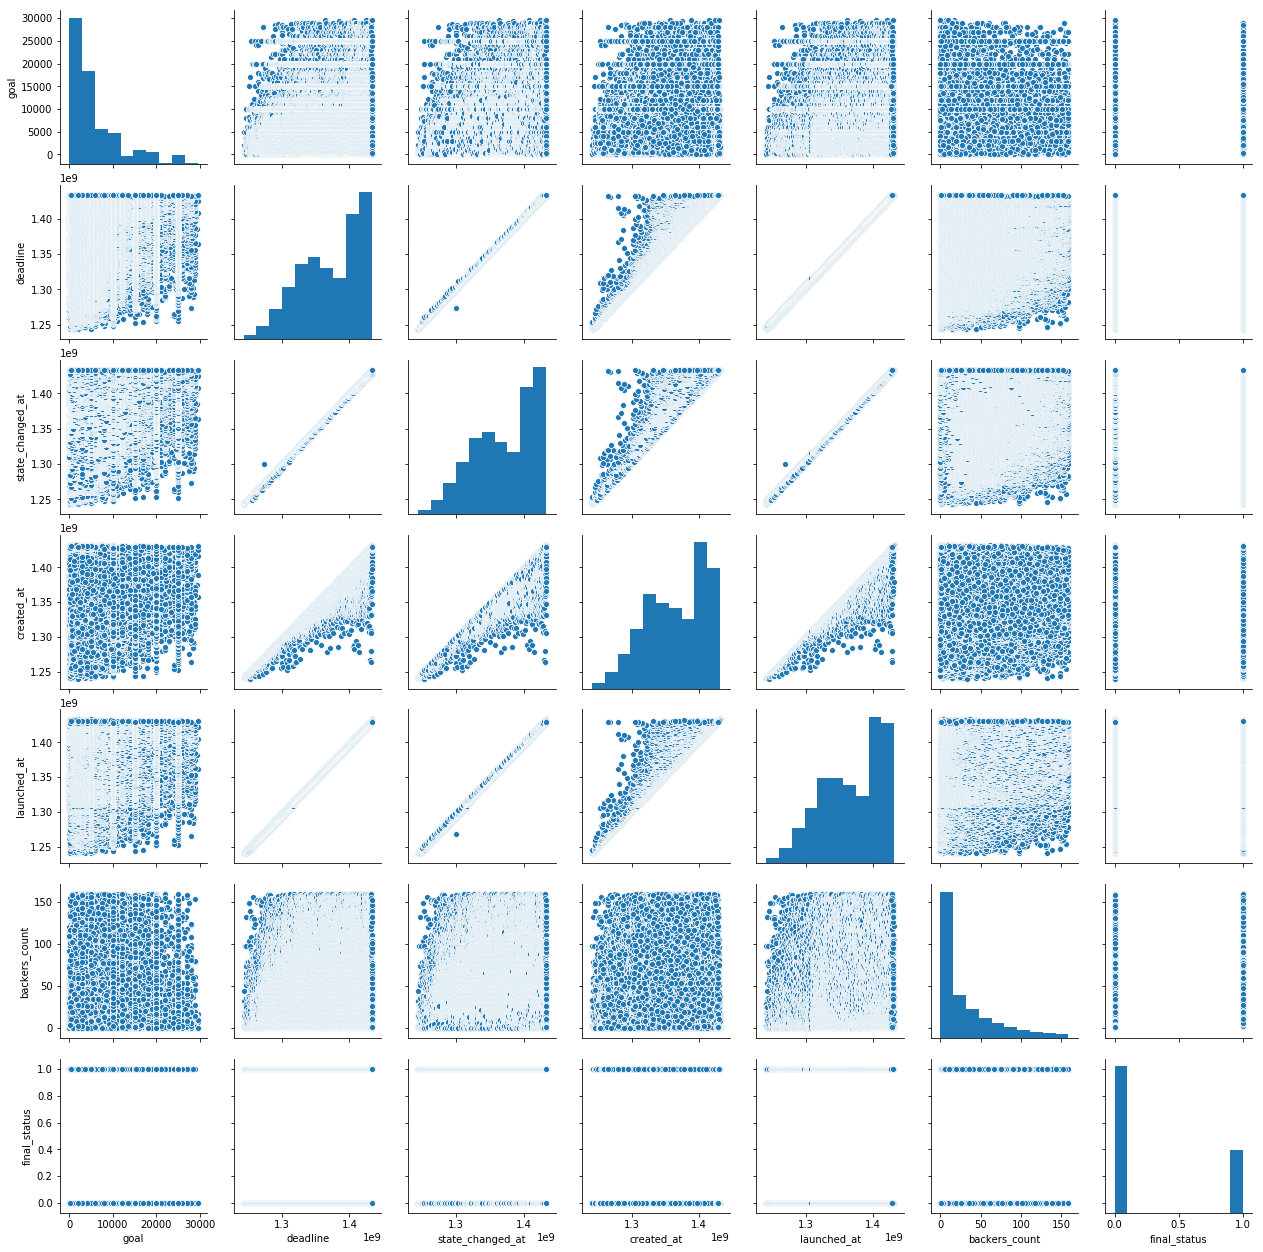

In [10]:
sns.pairplot(features[['goal', 'deadline', 'state_changed_at', 'created_at', 'launched_at', 'backers_count', 'final_status']])

In [19]:
# Baseline Neural Net Prediction Model

X = features.drop(columns='final_status')
Y = features.final_status

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.9, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(500,))

mlp.fit(x_train, y_train)

print(mlp.score(x_test, y_test))
print(cross_val_score(mlp, x_test, y_test, cv=5))

0.7000672289451167
[0.70007639 0.29992361 0.29992361 0.70005348 0.70005348]


In [14]:
# Baseline Weak Learners Model
from sklearn import ensemble

gbc = ensemble.GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)

gbc.fit(x_train, y_train)

print(gbc.score(x_test, y_test))
print(cross_val_score(gbc, x_test, y_test, cv=5))

0.8599957217944016
[0.86508785 0.85752483 0.86012223 0.85950034 0.86408435]


In [18]:
# Baseline Random Forest Model
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier(n_estimators=100, max_depth=2, min_samples_split=3)

gbc.fit(x_train, y_train)

print(gbc.score(x_test, y_test))
print(cross_val_score(gbc, x_test, y_test, cv=5))

0.859965163182985
[0.86508785 0.85752483 0.86012223 0.85942394 0.86408435]
